In [64]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Histogram

In [65]:
# Usuwamy brakujące wartości
dataset.dropna(subset=['Fare'], inplace=True)
# Darmowe bilety też nas nie interesują
dataset = dataset[dataset['Fare'] != 0]

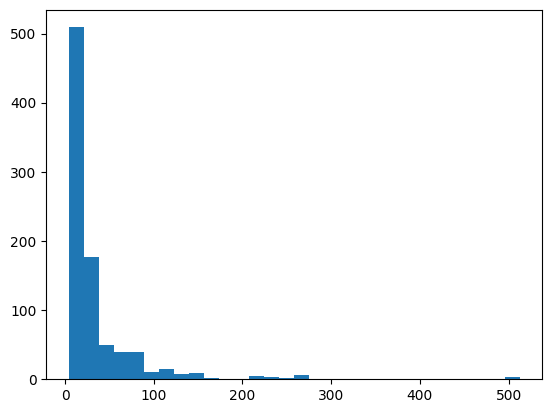

In [66]:
Fare_values = dataset['Fare'].values
plt.hist(Fare_values, bins=30)
plt.show()

Średnia, mediana, moda, zakres, kwartyle

In [67]:
mean_fare=np.round(np.mean(Fare_values))
median_fare=np.median(Fare_values)
mode_fare=stats.mode(Fare_values, keepdims=True)
q0 = np.quantile(Fare_values, 0.0)
q1 = np.round(np.quantile(Fare_values, 0.25))
q3 = np.round(np.quantile(Fare_values, 0.75))
q4 = np.round(np.quantile(Fare_values, 1.0))
range_fare=q4-q0

Dane statystyczne:

In [68]:
print(f"Średnia: {mean_fare}")
print(f"Mediana (Q2): {median_fare}")
print(f"Moda: {mode_fare[0]}")
print(f"Min: {q0}")
print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"Max: {q4}")
print(f"Zakres: {range_fare}")

Średnia: 33.0
Mediana (Q2): 14.5
Moda: [8.05]
Min: 4.0125
Q1: 8.0
Q3: 31.0
Max: 512.0
Zakres: 507.9875


Wykres z wyliczonymi danymi statystycznymi

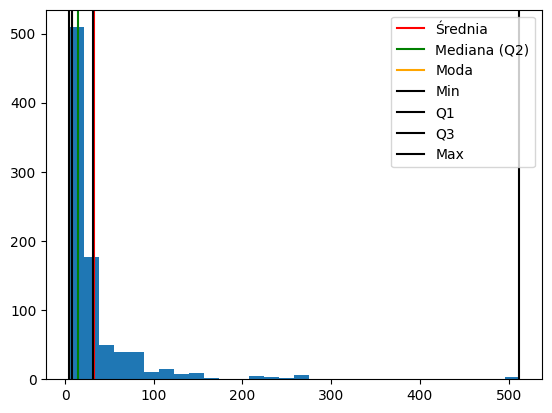

In [69]:
plt.hist(Fare_values, bins=30)
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.axvline(x = median_fare, color='green', label = 'Mediana (Q2)')
plt.axvline(x = mode_fare[0], color='orange', label = 'Moda')
plt.axvline(x = q0, color='black', label = 'Min')
plt.axvline(x = q1, color='black', label = 'Q1')
plt.axvline(x = q3, color='black', label = 'Q3')
plt.axvline(x = q4, color='black', label = 'Max')
plt.legend(loc='upper right')
plt.show()

Boxplot

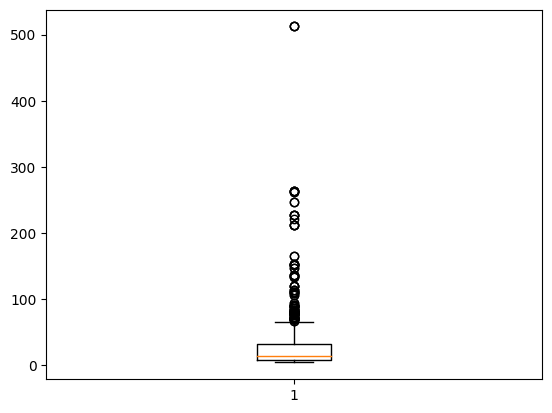

In [70]:
plt.boxplot(Fare_values)
plt.show()

Odchylenie standardowe

In [71]:
standard_deviation_fare = np.std(Fare_values, ddof=1)
print(standard_deviation_fare)

49.93682576210329
